In [9]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df = pd.read_csv(r"C:\Users\Venu Shambhu\Desktop\DV_Project\Data\coin_Bitcoin.csv")

print(df.head())

print(df.info())


   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   S

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['daily_return'] = df['Close'].pct_change()
df['rolling_volatility'] = df['daily_return'].rolling(window=30).std()
df['Month'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.year


In [11]:
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,daily_return,rolling_volatility,Month,Year
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,NaN,NaN,2013-04,2013
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,-0.038328,NaN,2013-04,2013
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,-0.158345,NaN,2013-05,2013
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,-0.100692,NaN,2013-05,2013
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,-0.070906,NaN,2013-05,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,0.009679,0.051701,2021-07,2021
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,0.022760,0.051207,2021-07,2021
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,0.017861,0.050212,2021-07,2021
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,-0.043692,0.050410,2021-07,2021


## **1.What is the trend of Bitcoin’s closing price over time?**

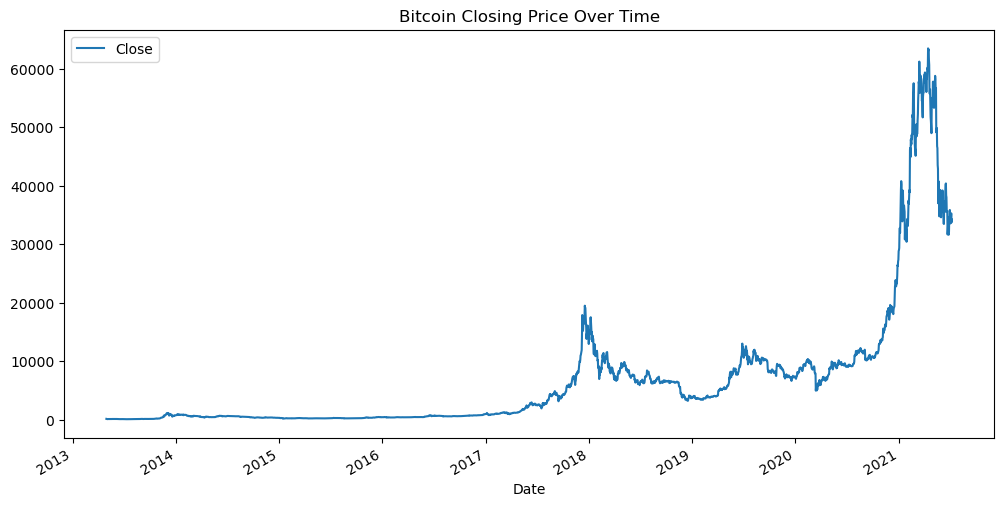

In [26]:

df.plot(x='Date', y='Close', figsize=(12,6), title='Bitcoin Closing Price Over Time')
plt.show()

##### This line chart helps us understand how the price of Bitcoin has evolved historically. By visualizing the closing price over time, we can identify long-term trends such as bull runs, crashes, or periods of consolidation. It also allows us to associate major external events with price fluctuations. This overview gives investors insight into market cycles and sentiment.

## **2.How are daily returns of Bitcoin distributed?**

##### A histogram of daily returns reveals the volatility of Bitcoin. It shows how frequently Bitcoin experiences gains or losses of different magnitudes. A wider spread indicates higher risk and more extreme price swings. Understanding return distribution is critical for investors to estimate potential profit/loss scenarios and risk exposure.

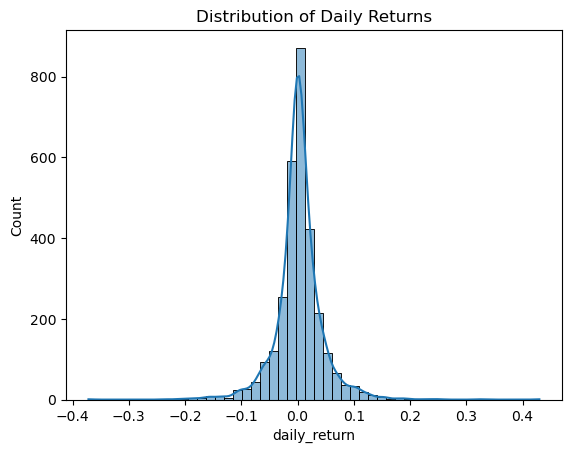

In [14]:
sns.histplot(df['daily_return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

## **3.How volatile has Bitcoin been over time?**

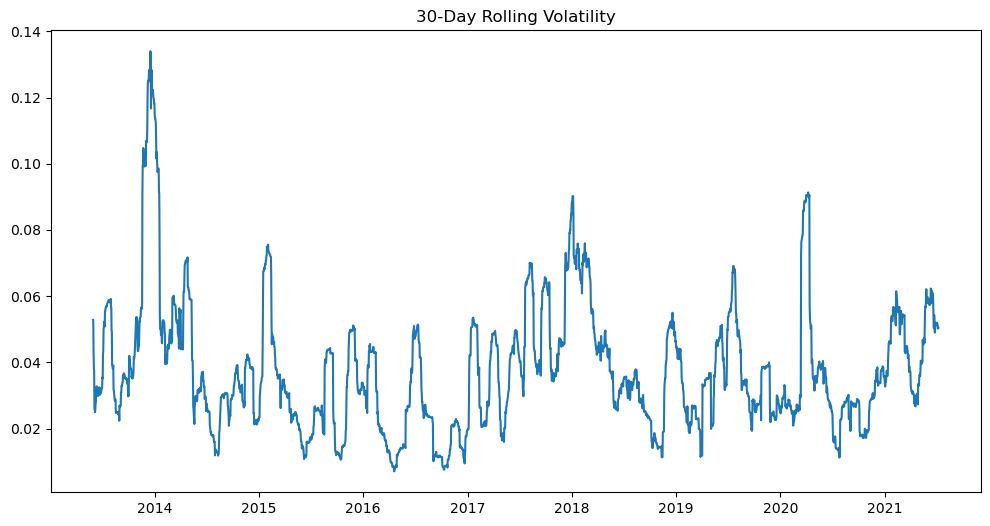

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['rolling_volatility'])
plt.title('30-Day Rolling Volatility')
plt.show()

##### The rolling volatility chart (e.g., 30-day standard deviation) shows how turbulent Bitcoin’s price movements are in different time periods. Spikes in this line indicate high uncertainty or panic in the market. Analyzing volatility patterns helps traders understand when the market was calm or reactive, which is essential for timing investment decisions.



## **4.Is there a relationship between trading volume and closing price?**

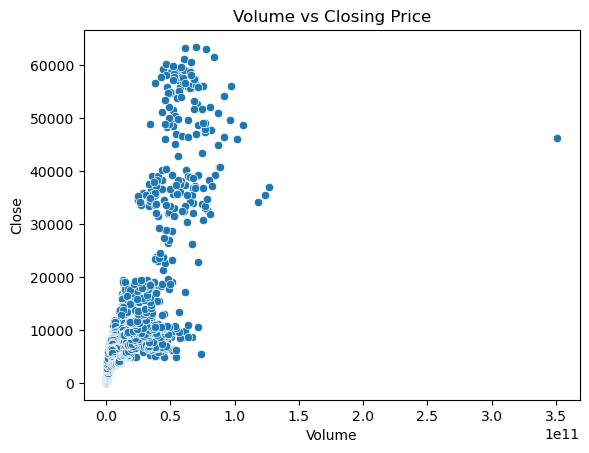

In [16]:
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Volume vs Closing Price')
plt.show()

##### This scatter plot helps determine whether changes in trading volume have a correlation with price movement. High trading volume often coincides with strong price moves due to increased buying/selling activity. Observing this relationship can suggest whether volume is a predictor of bullish or bearish trends.



## **5.What are the top 10 days with the highest gains and losses in Bitcoin history?**

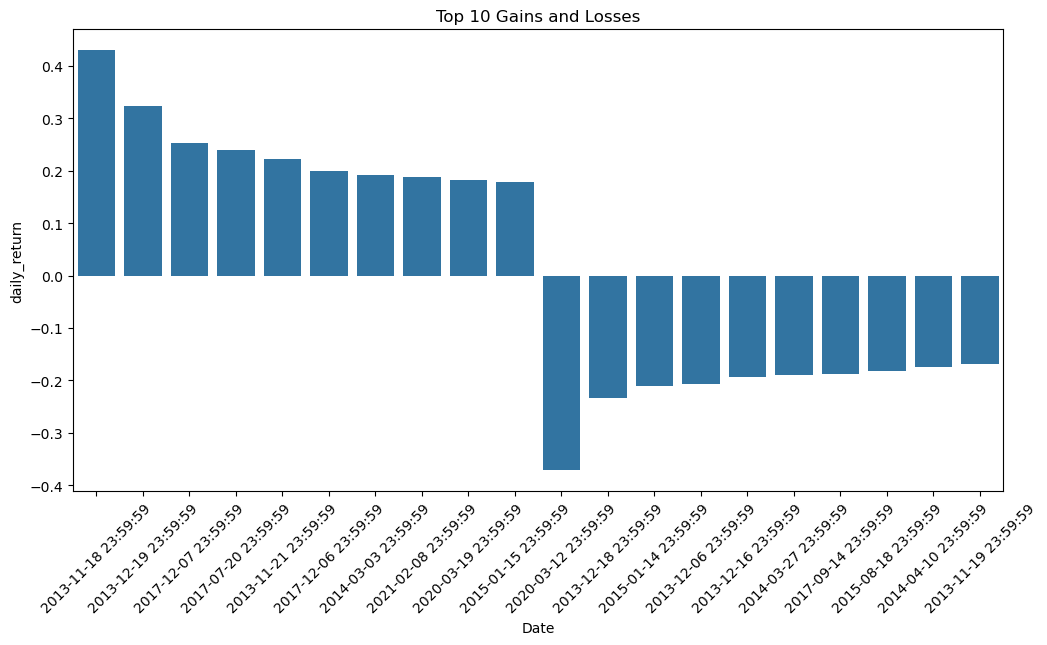

In [17]:
top_gains = df.sort_values('daily_return', ascending=False).head(10)
top_losses = df.sort_values('daily_return').head(10)
top_combined = pd.concat([top_gains, top_losses])
plt.figure(figsize=(12,6))
sns.barplot(x='Date', y='daily_return', data=top_combined)
plt.xticks(rotation=45)
plt.title('Top 10 Gains and Losses')
plt.show()

##### By isolating the most extreme daily returns (both positive and negative), we gain insight into Bitcoin's most volatile days. These spikes often align with major market news or global financial events. Such an analysis helps us understand how external shocks affect crypto prices and assess historical risk.



## **6.How do Bitcoin’s average returns vary month-to-month?**

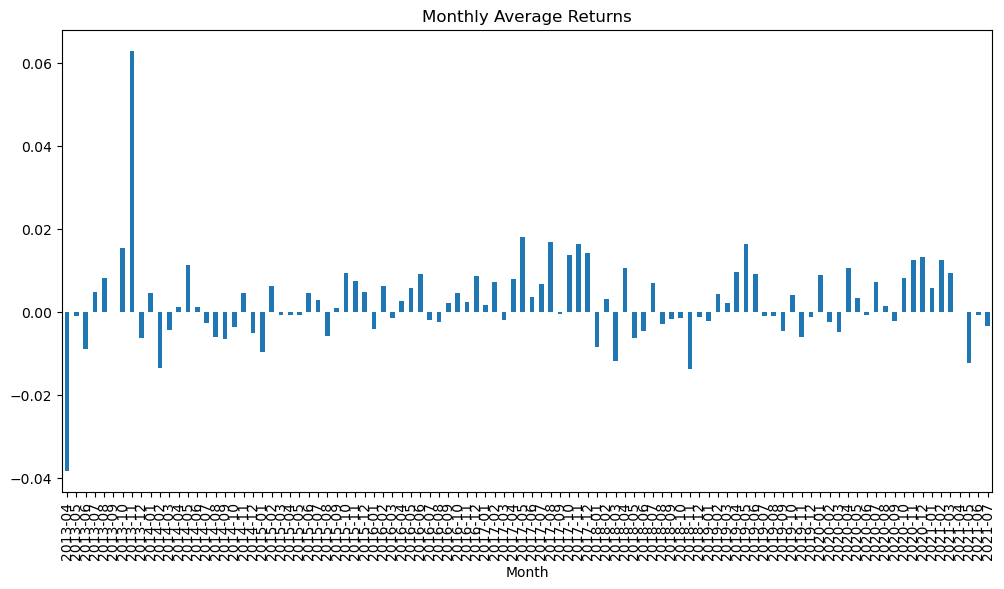

In [18]:
monthly_returns = df.groupby('Month')['daily_return'].mean()
monthly_returns.plot(kind='bar', figsize=(12,6), title='Monthly Average Returns')
plt.xticks(rotation=90)
plt.show()

##### This bar chart displays the average daily return for each month across all years in the dataset. It helps uncover seasonal trends or consistent bullish/bearish months. For example, if certain months frequently produce gains, traders may use this for planning entry/exit strategies. It's a form of time-based pattern analysis.

## **7.How has the average closing price changed year over year?**

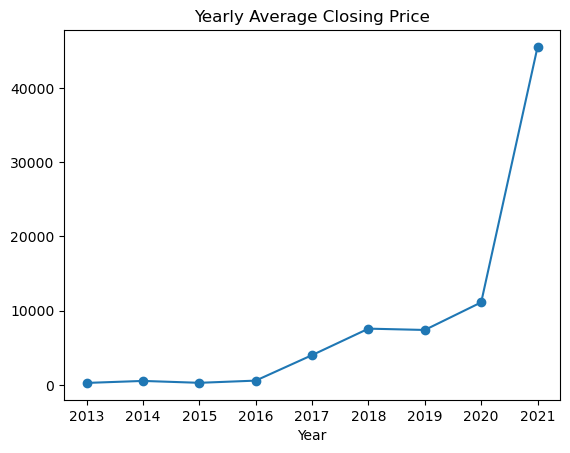

In [19]:

yearly_avg = df.groupby('Year')['Close'].mean()
yearly_avg.plot(kind='line', marker='o', title='Yearly Average Closing Price')
plt.show()



##### Yearly average price trends reveal Bitcoin's broader market growth. Despite short-term fluctuations, this view shows if Bitcoin is appreciating over the long term. A steadily increasing trend would suggest long-term investor confidence and adoption, while declines may reflect bear markets or reduced market interest.



## **8.How do short-term and long-term moving averages compare to actual closing prices?**

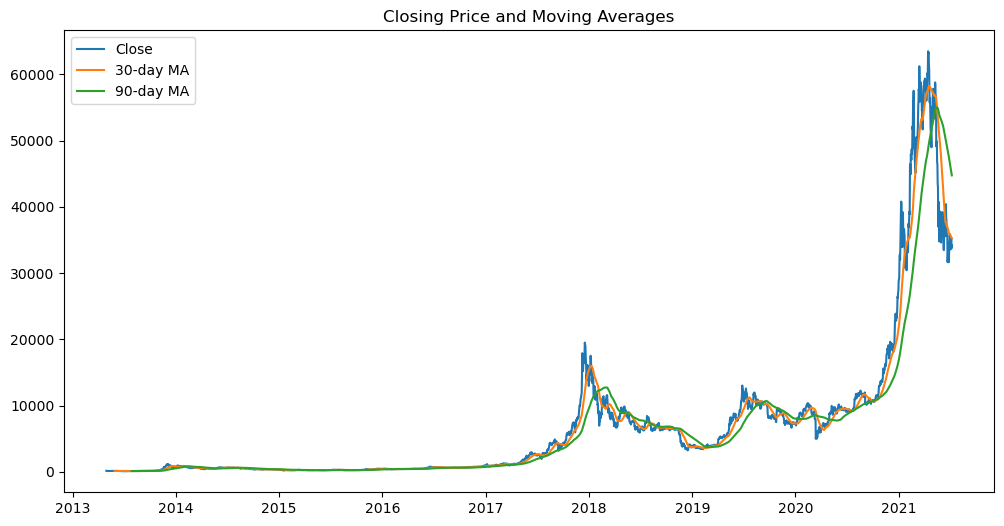

In [20]:
plt.figure(figsize=(12,6))
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA90'] = df['Close'].rolling(window=90).mean()
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA30'], label='30-day MA')
plt.plot(df['Date'], df['MA90'], label='90-day MA')
plt.legend()
plt.title('Closing Price and Moving Averages')
plt.show()

##### Comparing 30-day and 90-day moving averages (MAs) with the actual closing price helps smooth out noise and clarify market direction. Crossovers between the short and long-term MAs can indicate trend reversals or confirm ongoing trends. Investors use these signals for timing entry and exit points.

## **9.What price behavior is observed within a specific month (e.g., January 2021)?**

##### A candlestick chart shows open, high, low, and close prices for each day, giving a detailed view of intraday activity and market psychology. This is especially useful for short-term trading analysis. Observing a specific month can help identify patterns like bullish reversals or consolidation phases.

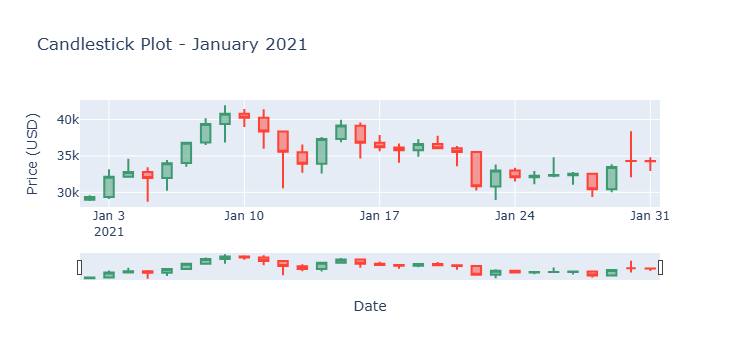

In [29]:
df_sample = df[(df['Date'] >= '2021-01-01') & (df['Date'] <= '2021-01-31')]
fig = go.Figure(data=[
    go.Candlestick(x=df_sample['Date'],
                   open=df_sample['Open'],
                   high=df_sample['High'],
                   low=df_sample['Low'],
                   close=df_sample['Close'])
])
fig.update_layout(title='Candlestick Plot - January 2021', xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

 ## **10.Is there a linear relationship between the opening and closing prices of Bitcoin?**


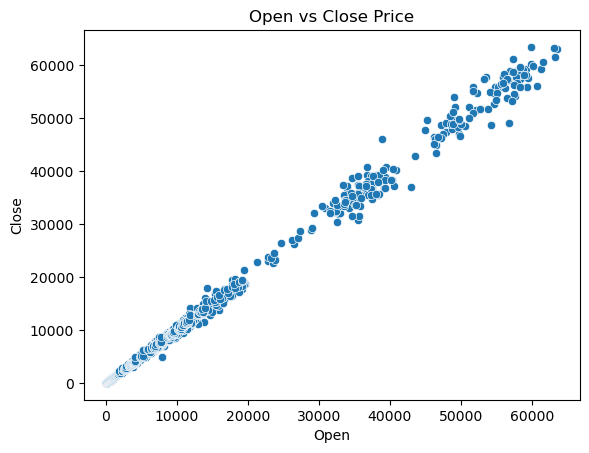

In [22]:
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Open vs Close Price')
plt.show()

##### This scatter plot highlights the correlation between the day's opening and closing prices. A strong linear relationship suggests relatively stable intraday performance. Significant deviations, on the other hand, indicate days with large volatility or sudden market sentiment shifts within a single trading session.